<a href="https://colab.research.google.com/github/AkashMuttalwad/Capstone-Project-propensity-model_1/blob/main/Capstone_Project_1_Propensity_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project : Propensity model**
**Problem Description**

We have larage number of customers. our seles team would like to call potantial customers who can buy our service. we don't have enough manpower and time to call and reach every customer and conviance them for our products also we need to rank customers so that we could after them our product and services with discounted services

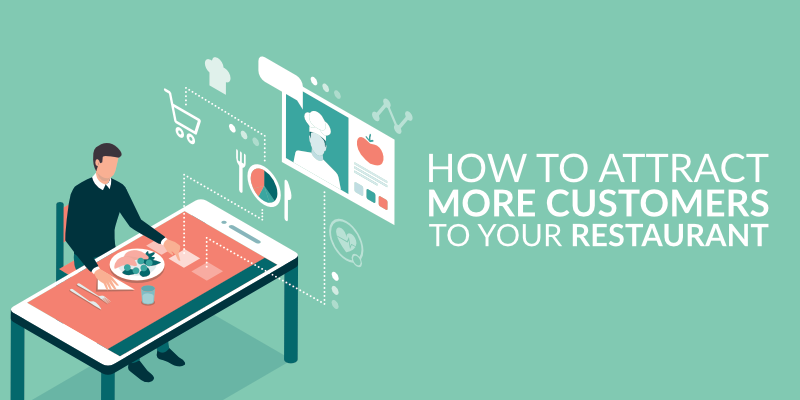

•	High value customer  - count high value Spender customers 

•	Low value customer count low value spender customers.

•	Lost Customers  - %

•	Top Customers - Premium Customers 

•	maximum transaction From a Country 

•	Random customers  - ordinary customers 

•	Cancellations - Number of previous order that were cancelled by the customer 

•	Missing values - %

•	Customer segmentation.

•	Find Potential Vs Non Potential Customers.

•	Who Can Buy Our Services In Current Month? Prediction (Predicted Sales for Future).

•	Customer Lifetime Value (cltv) --Live vs Dead Customers.--Recency, Frequency, Monetary Analysis.

•	Lifetime Package --


# **Importing Library and connecting drive**

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
from numpy import *
import datetime as dt
import missingno as msno

In [156]:
from google.colab import drive
df = pd.read_excel('/content/drive/MyDrive/Python/Online Retail.xlsx')
df.head()
df1 = df
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Exploratory Data Analysis(EDA)**

In [157]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [158]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In our data frame InvoiceNo, StockCode, Description, InvoiceDate and Country are the Non-numeric Variables

Quantity, UnitPrice and CustomerID are numeric Variables

Our dataset is composed of 541909 rows and 8 columns. When going through the columns, we notice that we have some missing values in the CustomerID column, and  the column Description has missing values.

In [159]:
#top 20 Data frome data set
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [160]:
#bottom 20 Data frome data set
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France


In [161]:
# Total Transaction: 541909
df.shape

(541909, 8)

**in our data frame Null values Description**

In [9]:
# Null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Checking the missing values

miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

Missing values:
Description      1454
CustomerID     135080
dtype: int64


# **As we found null values from the CustomerID column and Description Column we can represanted it through the graphical representation**

# **Graphical representaion of missing values**

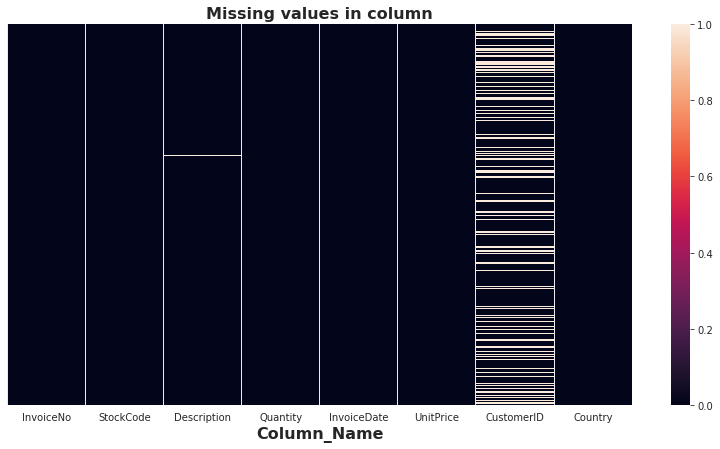

In [162]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=16, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=16)
plt.show()

# **Null Values in msno Graph** 

total number of obseration is: 541909


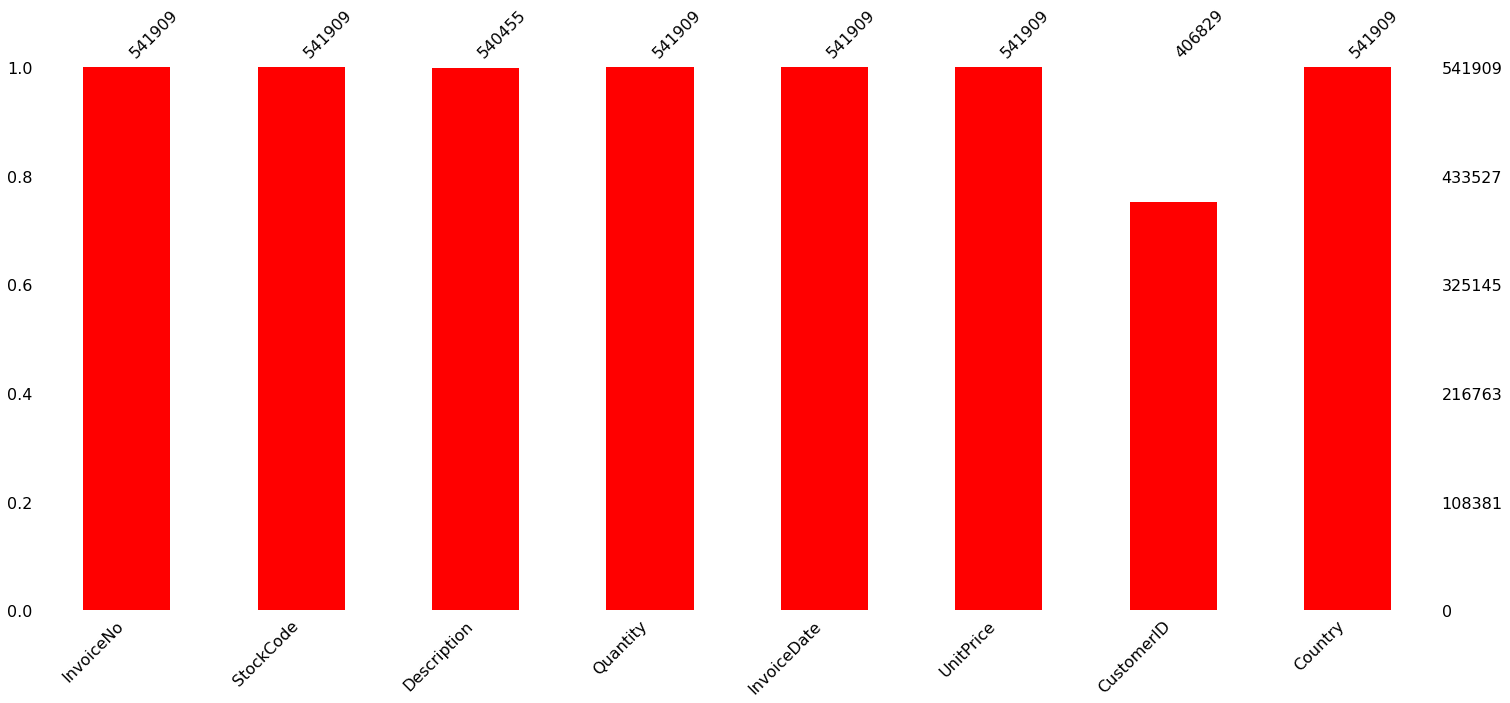

In [12]:
#Null Values in msno Graph 
null_plot = msno.bar(df, color = "red",)
print ('total number of obseration is:',df.shape[0])

# **Checking the Duplicated Rows #True means the Duolicated Rows.**

In [13]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

# in histrogram graph represents the

 **Quntity**

**invociceDate**

**Unitprice**

**CustomerID**

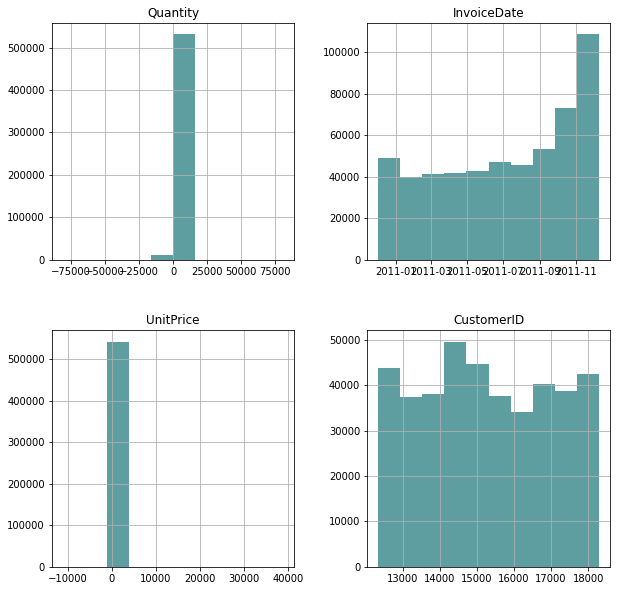

In [14]:
df_hist_plot = df.hist(figsize = (10,10), color = "#5F9EA0")

# **Dependant Customers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


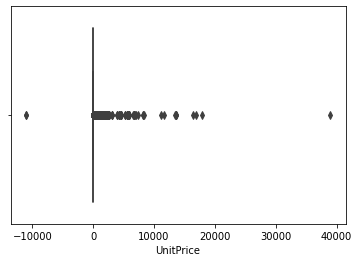

In [15]:
#box plot has created with the help of UnitPrice 
sns.boxplot(df['UnitPrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


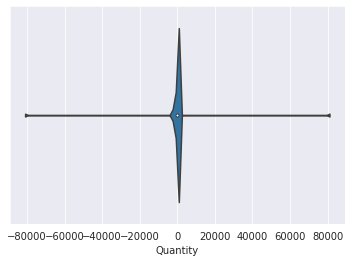

In [164]:
#Vilin plot has created with the help of Qunity 
sns.violinplot(df["Quantity"])

# Unique Countrys from data 

In [165]:
#Unique Countrys from data 
df.Country.nunique()

38

#Analyzing the data further, we find that most of the data (more than 90%) is for transactions that happened in United Kingdom.

In [166]:
#Analyzing the data further, we find that most of the data (more than 90%) is for transactions that happened in United Kingdom.
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [167]:
df1=df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


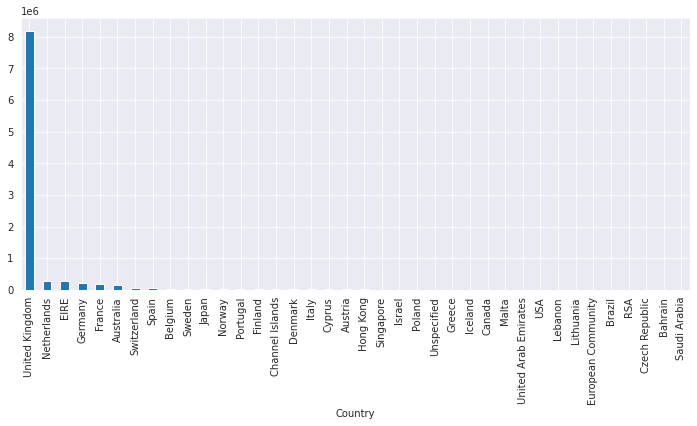

In [168]:
plt.figure(figsize=(12,5))
df.groupby("Country")["TotalCost"].sum().sort_values(ascending=False).plot(kind="bar")

#We will first group by country then aggregate over customerID to find out number of customers from each country.

In [169]:
#We will first group by country then aggregate over customerID to find out number of customers from each country.
df.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
31,Spain,2533
24,Netherlands,2371
3,Belgium,2069
33,Switzerland,1877
27,Portugal,1480
0,Australia,1259


# **Unique Values In Each Feature Coulmn**

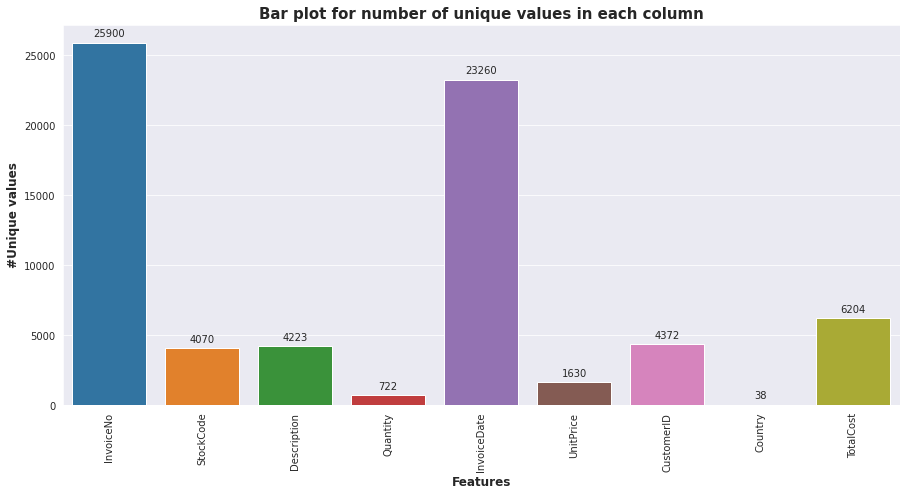

In [170]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [171]:
#we will Drop null values
df.dropna(inplace = True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalCost      0
dtype: int64

In [172]:

#df.sort_values('UnitePrice', ascending=False , inplace = True )
df.sort_values("UnitPrice", axis = 0, ascending = False,
                 inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,-8142.75
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,-4287.63
...,...,...,...,...,...,...,...,...,...
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00,16560.0,United Kingdom,0.00
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom,0.00
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.0,United Kingdom,0.00
187613,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.00,17667.0,United Kingdom,0.00


In [173]:
df.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.0
...,...,...,...,...,...,...,...,...,...
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.0
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


we can see there are some quantity showing unite price zero. unit price must not be zero so we add some minimul amount so we can consider them

In [174]:
df.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.0
...,...,...,...,...,...,...,...,...,...
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.0
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [175]:
col = df['UnitPrice']
col.replace(to_replace = 0.00, value = 0.1, inplace=True)

# we will find total puchase made by each customer

adding new coloumn in datase as total purchase amount

In [176]:
TotalPurchaseAmount = df.Quantity * df.UnitPrice

df["Total_Revenue_Generated"] = TotalPurchaseAmount

display(df.sort_values("Total_Revenue_Generated", ascending = False))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Total_Revenue_Generated
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,7144.72
...,...,...,...,...,...,...,...,...,...,...
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,-8142.75,-8142.75
422375,C573079,M,Manual,-2,2011-10-27 14:15:00,4161.06,12536.0,France,-8322.12,-8322.12
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00,-38970.00
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,-77183.60


# we will see the repation of customer

In [177]:
repeated_customers = df.CustomerID.value_counts()

In [179]:
#see top 20 most repeated customers
repeated_customers.head(20)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
15039.0    1508
14156.0    1420
18118.0    1284
14159.0    1212
14796.0    1165
15005.0    1160
16033.0    1152
14056.0    1128
14769.0    1094
17511.0    1076
Name: CustomerID, dtype: int64

In [180]:
 df1 = df.groupby(['CustomerID' ]) ['Total_Revenue_Generated'].aggregate('count').reset_index().sort_values('Total_Revenue_Generated' , ascending = False)

In [181]:
display(df1)

,CustomerID,Total_Revenue_Generated
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
...,...,...
1318,14119.0,1
1046,13747.0,1
2400,15590.0,1
2379,15562.0,1


'(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=np.mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, \nsaturation=0.75, errcolor=".26", errwidth=None, capsize=None, dodge=True, ax=None, **kwargs) -> Any'

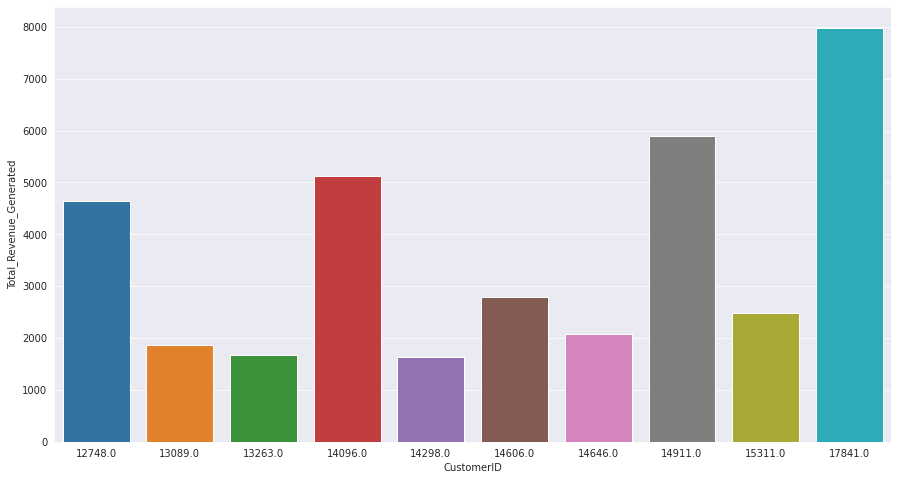

In [182]:
sns.set_style('darkgrid')
#sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'CustomerID' , y = 'Total_Revenue_Generated' , data = df1.head(10) , ax=ax)

'''(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=np.mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, 
saturation=0.75, errcolor=".26", errwidth=None, capsize=None, dodge=True, ax=None, **kwargs) -> Any'''

# **Revenue Generated From Different Countries**

we can see that most of our revenue generated from uk so we can focus on uk based customers. let see how much customers we have in uk. 

In [183]:
df1 = df.groupby(['Country'],)['Total_Revenue_Generated'].aggregate('count').reset_index().sort_values('Total_Revenue_Generated', ascending=False)

In [53]:
df1.head()

,Country,Total_Revenue_Generated
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


In [184]:
df1.sort_values('Total_Revenue_Generated' , inplace = True , ascending = False)

In [185]:
df2 = df1.head(10) 

In [186]:
df2

,Country,Total_Revenue_Generated
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533
23,Netherlands,2371
3,Belgium,2069
32,Switzerland,1877
26,Portugal,1480
0,Australia,1259


As we see we get nearly 93%. here we showing top 5 counties ony if we consider all on an average we get 89% of revenue from United Kingdom. So we can use to we can give our more attention towords the united kindoms customers and also build plan to grow in different countries.  

# **Lets see how much orders we got in every month in total span**

In [187]:
#let see our order range
# we have orders from 1st of dec 2010 to 9th dec. 2011
df['InvoiceDate'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]>

In [188]:
#removing hrs:second from date
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%d/%m/%Y')

In [189]:
#changing into datetimeforat
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [190]:
df.dtypes

InvoiceNo                          object
StockCode                          object
Description                        object
Quantity                            int64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                        float64
Country                            object
TotalCost                         float64
Total_Revenue_Generated           float64
dtype: object

In [191]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Total_Revenue_Generated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,20.34


In [192]:
df['InvoiceNo'].groupby([df.InvoiceDate.dt.year]).agg('count')

InvoiceDate
2010     26850
2011    379979
Name: InvoiceNo, dtype: int64

In [193]:
df['InvoiceNo'].groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.month ]).agg('count')

InvoiceDate  InvoiceDate
2010         1               1968
             2               2044
             3               1117
             5               2724
             6               1974
             7               1133
             8               2021
             9               1822
             10              1449
             12             10598
2011         1              25848
             2              23151
             3              28057
             4              27871
             5              30499
             6              33480
             7              33090
             8              30308
             9              38612
             10             43839
             11             55749
             12              9475
Name: InvoiceNo, dtype: int64

In [194]:
#counting the orders on every every month
df1 = df.groupby([df.InvoiceDate.dt.month],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

In [195]:
#changing the name of columns
df1.rename(columns = {'InvoiceDate':'Month' , "InvoiceNo" : "Number_Of_Orders"}, inplace = True)
df1.head()

,Month,Number_Of_Orders
11,12,20073
10,11,55749
9,10,45288
8,9,40434
7,8,32329


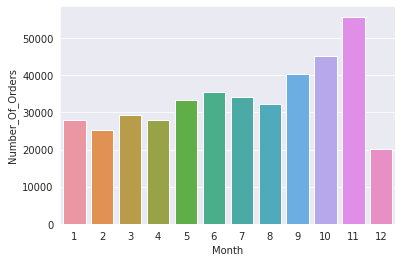

In [196]:
#ploting the bar plot monts vs Number_of_Orders
sns.barplot(x = 'Month', y = "Number_Of_Orders" , data = df1)

In [197]:
#counting the orders on every day
df.groupby(['InvoiceDate'],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,2011-12-10,1596
303,2011-12-09,1507
302,2011-12-08,707
301,2011-12-07,763
300,2011-12-06,1073
...,...,...
4,2010-06-12,1974
3,2010-05-12,2724
2,2010-03-12,1117
1,2010-02-12,2044


In [198]:
df.groupby(df.InvoiceDate.dt.month)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending = False)

,InvoiceDate,InvoiceNo
11,12,20073
10,11,55749
9,10,45288
8,9,40434
7,8,32329
6,7,34223
5,6,35454
4,5,33223
3,4,27871
2,3,29174


In [199]:
# yearly count of orders
df.groupby(df.InvoiceDate.dt.year)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending = False)

,InvoiceDate,InvoiceNo
1,2011,379979
0,2010,26850


# **RFM Analysis Analysis Using Python**

**RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.**

Let’s assume we are a company, our company name is geek, let’s perform the RFM analysis on our customers

**Recency: How recently has the customer made a transaction with us**

**Frequency: How frequent is the customer in ordering/buying some product from us**

**Monetary: How much does the customer spend on purchasing products from us** **bold text**

In [200]:
# Let's observe the last transaction date.
# So we can determine the performans/measurement date for calculating how recent a customer's latest purchase was.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2011-12-10 00:00:00')

# **So for recency we will take 2011–12–10 as our reference date.**

In [201]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [202]:
#Find the last order date in our data:
df.InvoiceDate.max()
#So for recency we will take 2011–12–10 as our reference date.
import datetime as dt
NOW = dt.datetime(2011,12,10)

‘Now’ is a date type object; so for data processing, we will convert the InvoiceDate column into pandas date object. Next we groupby CustomerID and aggregate using lambda functions.

In [203]:
rfmTable=df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_Revenue_Generated':lambda x: x.sum()})
rfmTable.head()

,InvoiceDate,InvoiceNo,Total_Revenue_Generated
CustomerID,,,
12346.0,326,2,0.00
12347.0,40,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [204]:
# changinf columns names InvoiceDate To Recency, InvoiceNo TO Frequency, Total_Revenue_Generated TO monetary_value  
rfmTable.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_Revenue_Generated':'monetary_value'},inplace=True)
rfmTable.head()

,Recency,Frequency,monetary_value
CustomerID,,,
12346.0,326,2,0.00
12347.0,40,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [205]:
#lets put these customers into bins. We will categorize each customers into quartiles — [0.25,0.5,0,75]. So 0.25 is 25th percentile, 0.5 is 50th percentile and so on.
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Recency': {0.25: 20.0, 0.5: 57.0, 0.75: 152.0},
 'monetary_value': {0.25: 293.9525, 0.5: 648.55, 0.75: 1611.725}}

In [207]:
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['F_rank'] = df['InvoiceNo'].rank(ascending=True)
df['M_rank'] = df['InvoiceNo'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Total_Revenue_Generated,R_rank,F_rank,M_rank,R_rank_norm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,15.30,23573.5,NaN,NaN,5.794456
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,20.34,23573.5,NaN,NaN,5.794456
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,22.00,23573.5,NaN,NaN,5.794456
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,20.34,23573.5,NaN,NaN,5.794456
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,20.34,23573.5,NaN,NaN,5.794456


**Calculating Frequency Value**

Here we are calculating the frequency value of customer spend on purchasing products from the company.

In [208]:
df_frequency = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# **Calculating Recency value**

Here we are calculating the recency value of customer spend on purchasing products from the company.

In [209]:
df_recency = df.groupby(by='CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'InvoiceDate']
recent_date = df_recency['InvoiceDate'].max()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18,326
1,12347.0,2011-10-31,40
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311


# **Calculating Monetary value**

Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [211]:
df['Total'] = df['CustomerID']*df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.0
1,12347.0,30348926.0
2,12348.0,28906668.0
3,12349.0,7792219.0
4,12350.0,2432950.0



# **Merging all three columns in one dataframe**
Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

In [220]:
df_rfm = df_recency.merge(df_frequency, on='CustomerID')

df_rfm = df_recency.merge(df_recency)


df_rfm = df_rfm.merge(df_monetary, on='CustomerID').drop(
    columns='InvoiceDate')
df_rfm.head()

,CustomerID,Recency,Monetary
0,12346.0,326,0.0
1,12347.0,40,30348926.0
2,12348.0,76,28906668.0
3,12349.0,19,7792219.0
4,12350.0,311,2432950.0


In [221]:
df_rf = df_recency.merge(df_frequency, on='CustomerID')
df_rfm = df_rf.merge(df_monetary, on='CustomerID').drop(
    columns='InvoiceDate')
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.0
1,12347.0,40,182,30348926.0
2,12348.0,76,31,28906668.0
3,12349.0,19,73,7792219.0
4,12350.0,311,17,2432950.0


# Ranking Customer’s based upon their recency, frequency, and monetary score
# Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [222]:
df_rfm['R_rank'] = df_rfm['Recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['Frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100
 
df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,326,2,0.0,4.176762,2.493138,2.493138
1,12347.0,40,182,30348926.0,59.766932,88.129003,88.129003
2,12348.0,76,31,28906668.0,41.686858,42.074565,42.074565
3,12349.0,19,73,7792219.0,77.189339,66.720037,66.720037
4,12350.0,311,17,2432950.0,5.399792,24.794145,24.794145


# **Calculating RFM score**

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15Recency score + 0.28Frequency score + 0.57 *Monetary score

In [223]:
df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 * \
    df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.14
1,12347.0,4.19
2,12348.0,2.10
3,12349.0,3.41
4,12350.0,1.09
5,12352.0,3.45
6,12353.0,0.34


Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer 

In [224]:
df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        df_rfm['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    df_rfm['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(df_rfm['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df_rfm[['CustomerID', 'RFM_Score', 'Customer_segment']].head(10)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.14,Lost Customers
1,12347.0,4.19,High value Customer
2,12348.0,2.10,Low Value Customers
3,12349.0,3.41,Medium Value Customer
4,12350.0,1.09,Lost Customers
5,12352.0,3.45,Medium Value Customer
6,12353.0,0.34,Lost Customers
7,12354.0,2.66,Low Value Customers
8,12355.0,1.08,Lost Customers
9,12356.0,3.12,Medium Value Customer


# **Visualizing the customer segments**

Here we will use a pie plot to display all segments of customers.

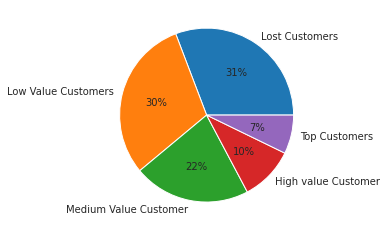

In [225]:
plt.pie(df_rfm.Customer_segment.value_counts(),
        labels=df_rfm.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Conclusions :

Top customers

High value Customers

Medium value Customers

Lost Customers

Low value Customers:

Top Customers:

There are 8% of Top customers or Premium customers ,they has Spending large number of values on our shop for our business revanue they are contrubuiting more so, we have to Discount on service for thses customers

As a conclusion, in order to ensure customer loyalty sustainable, cross-sell communications in line with customer expectations and needs can be organized for this segment.

High value Customers:

There are 10% of customers we have as high value customers they have spending on our shop , they also important to us As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned by observing habits of other customers with similar behaviors, and analyzing according product association rules.

Medium value Customers :

the Customers has spending 22% Average value in our shop they are key point for stablity in our busniess . for medium value spender to Top value spender we have to motovited them with some markrting offers.

Low value Customer : Low value customers has spending 30%  in our shop . we need to understand why they are not spending more amount in our shop we need to understand they are satisfed with our services or not if not then we need to attract them with diffrent marketing campaigns

Lost Customers : lost customers has 33% those customers which are come to our shop but but completed there order in our shop, they are cancelled order so we need to more focus on them , we had planing for better communication with them and try to understand there need and implemant on that portion which we requierd

# **Customer Lifetime Value**

What keeps a customer coming back?

Customers are gained and lost over the lifetime of any company, but a truly great product or service can keep customers well fed, yet still hungry for more—figuratively speaking. This appetite for more is what continuously adds value to the company over the span of their relationship with customers.

What is Customer Lifetime Value?
Customer lifetime value (CLV), sometimes referred to as lifetime value (LTV), is the profit margin a company expects to earn over the entirety of their business relationship with the average customer.

The customer lifetime value must account for customer acquisition costs (CAC), ongoing sales and marketing expenses, operating expenses, and, of course, the cost required to manufacture the product and services the company is selling.

Many companies take a short-sighted approach by overlooking this valuable metric and instead optimize for a single sale in the near term. It’s still important to find new customers for the growth of the company, but optimizing the lifetime value of existing customers is also essential for a company to sustain a viable business model.

In fact, an increase in customer retention rates by only 5% has been found to increase profits anywhere from 25% to 95%.1 With this in mind, increasing the expected customer lifetime value is essential.

In [228]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.1 MB/s 


In [229]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import \
    calibration_and_holdout_data, \
    summary_data_from_transaction_data, \
    calculate_alive_path
from lifetimes.plotting import \
    plot_frequency_recency_matrix, \
    plot_probability_alive_matrix, \
    plot_period_transactions, \
    plot_history_alive, \
    plot_cumulative_transactions, \
    plot_calibration_purchases_vs_holdout_purchases, \
    plot_transaction_rate_heterogeneity, \
    plot_dropout_rate_heterogeneity


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.0f}'.format

**Introduction to Cohort Analysis**

Let’s start with the basics. A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

When carrying out the cohort analysis, it is crucial to consider the relationship between the metric we are tracking and the business model. Depending on the company’s goals, we can focus on user retention, conversion ratio (signing up to the paid version of the service), generated revenue, etc.

In this article, I cover the case of user retention. By understanding user retention, we can infer the stickiness/loyalty of the customers and evaluate the health of the business. It is important to remember that the expected retention values vary greatly between businesses, 3 purchases a year for one retailer might be a lot, while for another might be far too little.

Retaining customers is critical for any business, as it is far cheaper to keep the current customers (by using CRM tools, member discounts, etc.) than to acquire new ones.

Furthermore, cohort analysis can also help to observe the impact of changes to the product on the user behavior, be it design changes or entirely new features. By seeing how the groups behave over time, we can more or less observe if our efforts had some effects on the users.

This should be enough of theory for now, let’s move to the real-life example.

In [231]:
#using previous dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Total_Revenue_Generated,R_rank,F_rank,M_rank,R_rank_norm,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,3,"17,850",United Kingdom,15,15,"23,574",NaN,NaN,6,"107,100"
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3,"17,850",United Kingdom,20,20,"23,574",NaN,NaN,6,"107,100"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,3,"17,850",United Kingdom,22,22,"23,574",NaN,NaN,6,"142,800"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3,"17,850",United Kingdom,20,20,"23,574",NaN,NaN,6,"107,100"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3,"17,850",United Kingdom,20,20,"23,574",NaN,NaN,6,"107,100"


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                406829 non-null  object        
 1   StockCode                406829 non-null  object        
 2   Description              406829 non-null  object        
 3   Quantity                 406829 non-null  int64         
 4   InvoiceDate              406829 non-null  datetime64[ns]
 5   UnitPrice                406829 non-null  float64       
 6   CustomerID               406829 non-null  float64       
 7   Country                  406829 non-null  object        
 8   TotalCost                406829 non-null  float64       
 9   Total_Revenue_Generated  406829 non-null  float64       
 10  R_rank                   406829 non-null  float64       
 11  F_rank                   0 non-null       float64       
 12  M_rank          

In [233]:
#In the customer IDs, we dropped all the rows which is represent as null.
df.dropna(subset=['CustomerID'], inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                406829 non-null  object        
 1   StockCode                406829 non-null  object        
 2   Description              406829 non-null  object        
 3   Quantity                 406829 non-null  int64         
 4   InvoiceDate              406829 non-null  datetime64[ns]
 5   UnitPrice                406829 non-null  float64       
 6   CustomerID               406829 non-null  float64       
 7   Country                  406829 non-null  object        
 8   TotalCost                406829 non-null  float64       
 9   Total_Revenue_Generated  406829 non-null  float64       
 10  R_rank                   406829 non-null  float64       
 11  F_rank                   0 non-null       float64       
 12  M_rank          

In [237]:
#We start by inspecting the distribution of the numeric variables — quantity, unit price and customerId.
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,12,6,4,1,4,6,9,12
Number_Of_Orders,12,"33,902","9,619","20,073","27,857","32,776","36,699","55,749"


From the table above, we can see that there are orders with negative quantity — most likely returns. In total, there are around 9 thousand purchases with a negative quantity. We remove them from the dataset. This introduces a kind of bias, as we include the initial orders and remove the return — this way the initial order is taken into account even though in theory it was not realized and did not generate revenue. However, for simplicity, we leave the initial order, as for metric such as retention (indicating the customers’ engagement) this should still be a valid assumption.

Then, we calculate an aggregate metric indicating how many orders were placed by each customer.

In [238]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


Using the code above, we can state that 69.97% of customers ordered more than once. This is already a valuable piece of information, as is seems that the customers are placing multiple orders. This means that there will be at least some retention. Given that the dataset has no sign-up/joined date, it would be problematic if the majority of the users only placed one order, but we will get back to it later.

Additionally, we look at the distribution of the number of orders per customer. For that, we can reuse the previously aggregated data (n_orders) and plot the data on a histogram.

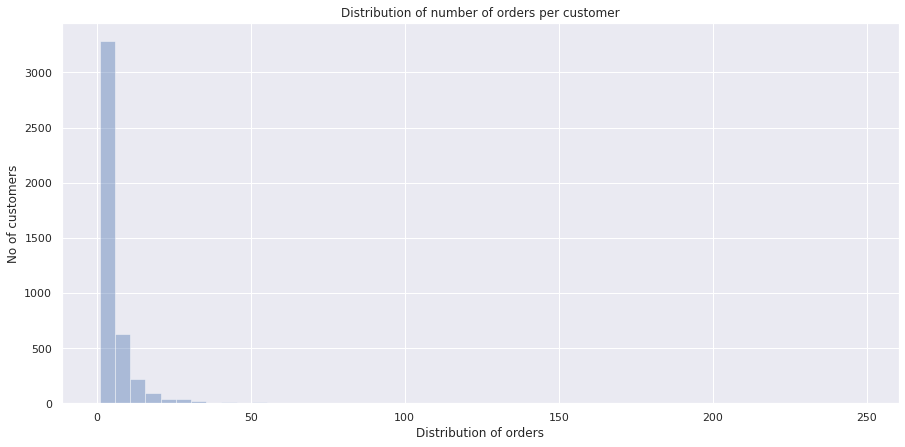

In [239]:
plt.figure(figsize=(15, 7))
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='Distribution of orders', 
       ylabel='No of customers');

# **Cohort Analysis**
The dataset we are using for this example does not contain the customer sign-up date — the date when they registered with the retailer. That is why we assume that the cohort they belong to is based on the first purchase date. A possible downside of this approach is that the dataset does not contain the past data, and what we already see in this snapshot (between 01/12/2010 and 09/12/2011) includes recurring clients. In other words, the first purchase we see in this dataset might not be the actual first purchase of a given client. However, there is no way to account for this without having access to the entire historical dataset of the retailer.

As the first step, we keep only the relevant columns and drop duplicated values — one order (indicated by InvoiceNo) can contain multiple items (indicated by StockCode).

In [241]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()

As the second step, we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [242]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M')

In [244]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,"17,850",536365,2010-01-12,2010-01,2010-01
7,"17,850",536366,2010-01-12,2010-01,2010-01
9,"13,047",536367,2010-01-12,2010-01,2010-01
21,"13,047",536368,2010-01-12,2010-01,2010-01
25,"13,047",536369,2010-01-12,2010-01,2010-01


Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group. Additionally, we add the period_number, which indicates the number of periods between the cohort month and the month of the purchase.

In [245]:
from operator import attrgetter
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [246]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-01,2010-01,98,0
1,2010-01,2010-02,9,1
2,2010-01,2010-03,4,2
3,2010-01,2010-05,7,4
4,2010-01,2010-06,7,5
...,...,...,...,...
246,2011-10,2011-11,50,1
247,2011-10,2011-12,10,2
248,2011-11,2011-11,218,0
249,2011-11,2011-12,10,1


The next step is to pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period.

In [247]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.

In [248]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [249]:
cohort_size

cohort
2010-01    98
2010-02   108
2010-03    49
2010-05    68
2010-06    76
2010-07    53
2010-08    87
2010-09    83
2010-10    38
2010-12   288
2011-01   599
2011-02   427
2011-03   409
2011-04   325
2011-05   271
2011-06   271
2011-07   226
2011-08   166
2011-09   240
2011-10   250
2011-11   218
2011-12    22
Freq: M, Name: 0, dtype: float64


Lastly, we plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size. That is why we in fact created two heatmaps, where the one indicating the cohort size is using a white only colormap — no coloring at all.

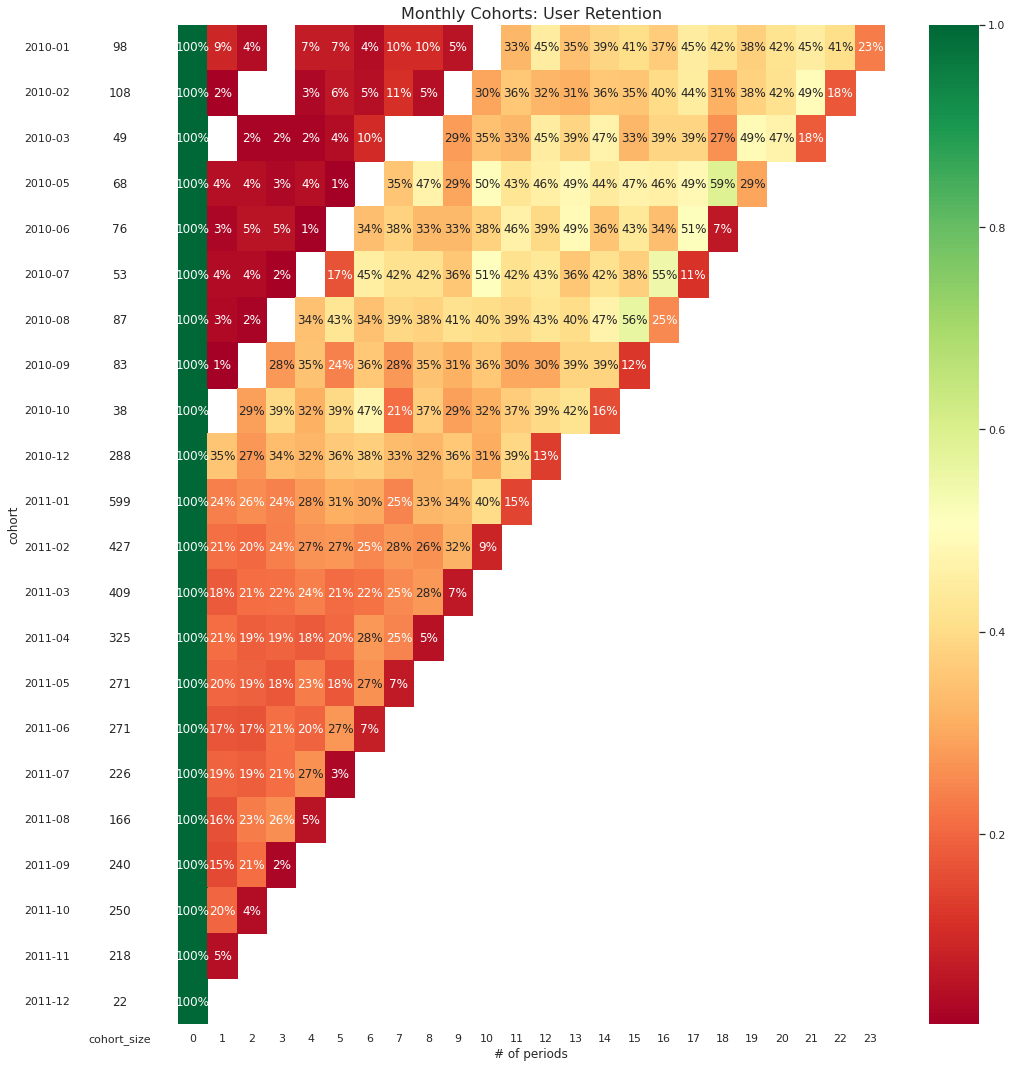

In [253]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(15, 15), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 80% of customers do not make any purchase in the second month. The first cohort (2010–12) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 50% retention. This might be a cohort of dedicated customers, who first joined the platform based on some already-existing connections with the retailer. However, from data alone, that is very hard to accurately explain.

Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.